# LendingClub Dataset
**Dataset Description：**
The dataset contains the homeloan records released from Lending Club. The problem lenders care is that whether a borrower can repay homeloan and interest on time. In addition, the homeloan interest rate is highly related with the loan credit of borrowers. A borrower with a higher credit can easily get homeloan with a lower rate. The task of the project is to predict whehter a borrower can replay homeloan and interest on time based on a number of features of the borrower. This is a typical classification problem and this notebook demonstrate how to use Lending Club dataset to decide whether a homeloan case should be approved based a borrower' features. 

**Dataset Detail Information*
The dataset contains 9,578 recrds in total. Every record has 13 features and 1 label which are described as below. 
* credit.policy: This is the label. Its value is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", “home_improvement” and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.Common FICO scores range from 300 to 850,with higher scores indicating better credit.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments

* not.fully.paid：Whether the borrower will be fully paid or not.

**Learning taks:**
1. Data should be preprocessed and cleaned. 
2. Feature selection should be conducted to remove irrelevant features.
3. Train a logistic regression model to predict "credit.policy" by using the other 13 features.
4. The logistic regression model should be evaluated with cross validation by using 5-10 folds.  

## Import Packages

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset and Clean Dataset

The purpose of this part is to guarantee the data used in the notebook is reliable. 。

In [250]:
Data = pd.read_csv('./data/loan_data.csv')
Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


After loading the dataset into the notebook, we can further check basic information of the dataset such as data type. 

In [251]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9577 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


According to the displayed dataset information, we can conclude that
1. The dataset is complete without missing any record. 
2. There are 13 features and 1 label. There are three possible datatypes, which are loat64,int64 and object
There are seven data types which are：credit_card, debt_consolidation, educational, major_purchase, small_business, home_improvement 和all_other。 Note that the type of purpose is object, which cannot be analyzed directly. This feature will be converted by OneHotEncoder or OrdinalEncoder.

Now, we can proveed to check basic statistical information of these features such as mean values, standard deviation, maximum and minimum values, etc. 

## Task 1: Based on Data info, please clean the dataset by removing abnormal data points or filling in missing values.  

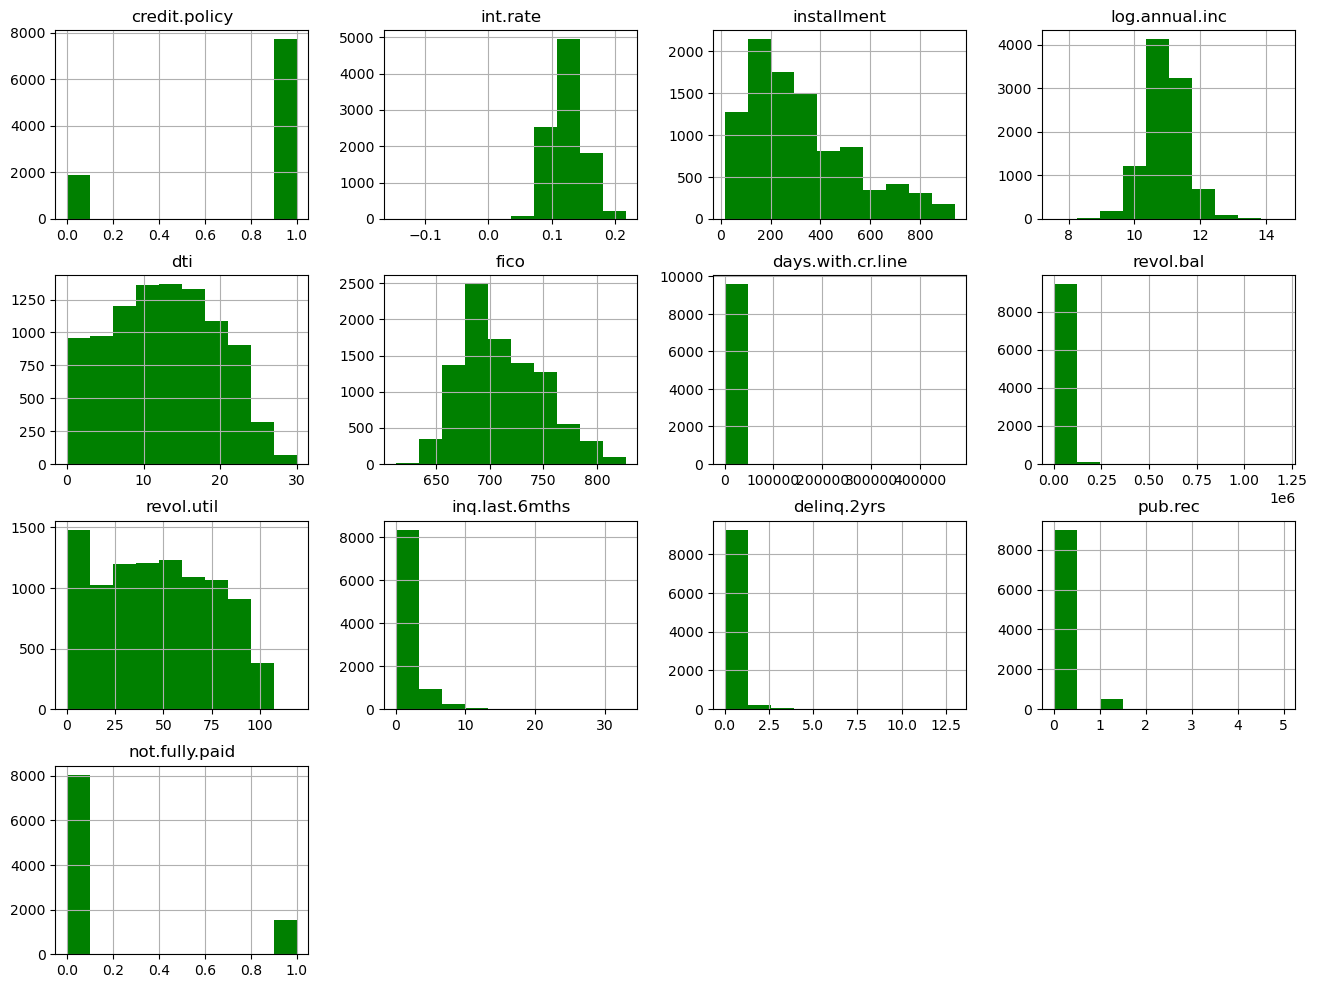

In [252]:
Data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

In [253]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122570,0.027163,-0.146100,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4609.450638,5380.501367,178.958333,2820.000000,4139.958333,5730.000000,4.710000e+05
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


<AxesSubplot:xlabel='credit.policy'>

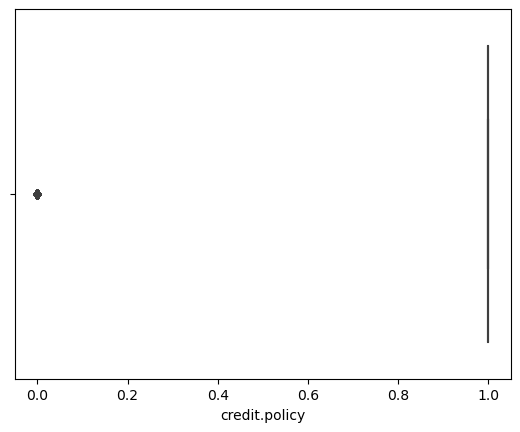

In [254]:
sns.boxplot(Data['credit.policy'])




<AxesSubplot:xlabel='int.rate'>

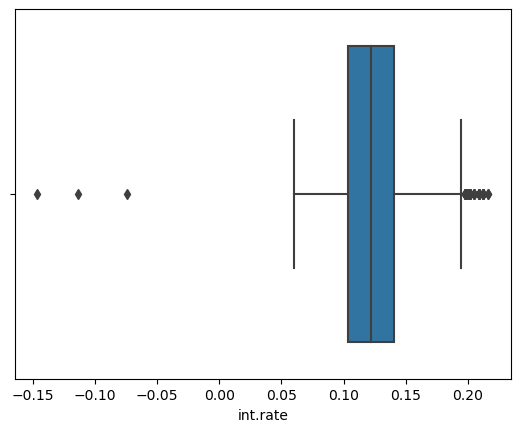

In [255]:
sns.boxplot(Data['int.rate'])


<AxesSubplot:xlabel='installment'>

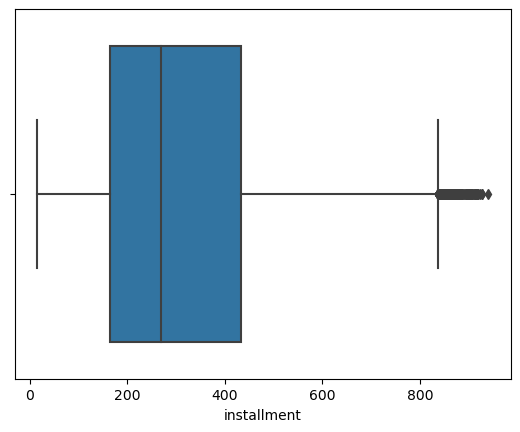

In [256]:
sns.boxplot(Data['installment'])


<AxesSubplot:xlabel='log.annual.inc'>

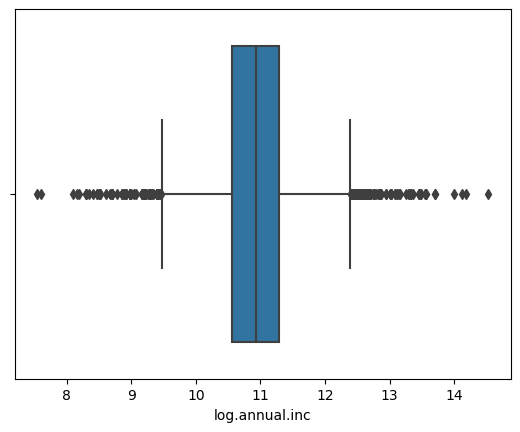

In [257]:
sns.boxplot(Data['log.annual.inc'])


<AxesSubplot:xlabel='dti'>

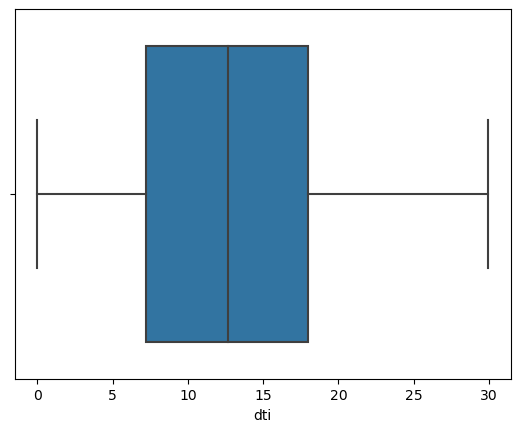

In [258]:
sns.boxplot(Data['dti'])


<AxesSubplot:xlabel='fico'>

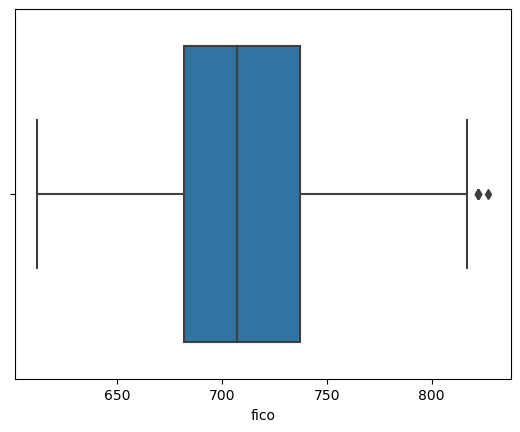

In [259]:
sns.boxplot(Data['fico'])


<AxesSubplot:xlabel='days.with.cr.line'>

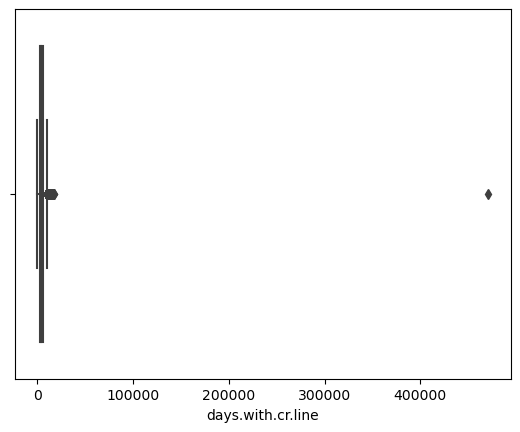

In [260]:
sns.boxplot(Data['days.with.cr.line'])


<AxesSubplot:xlabel='revol.bal'>

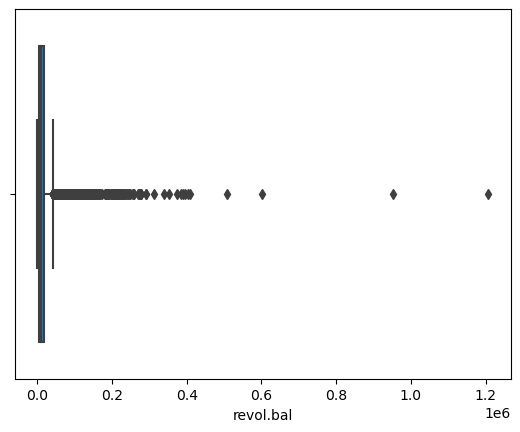

In [261]:
sns.boxplot(Data['revol.bal'])


<AxesSubplot:xlabel='revol.util'>

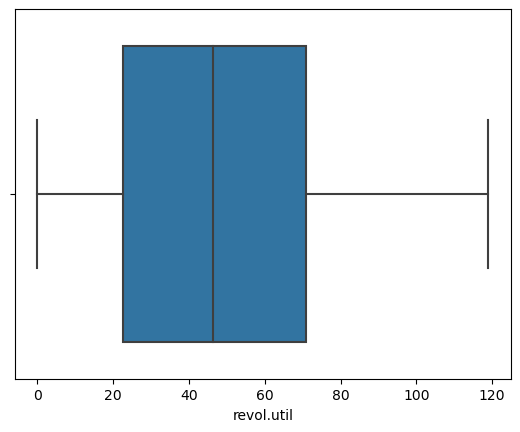

In [262]:
sns.boxplot(Data['revol.util'])


<AxesSubplot:xlabel='inq.last.6mths'>

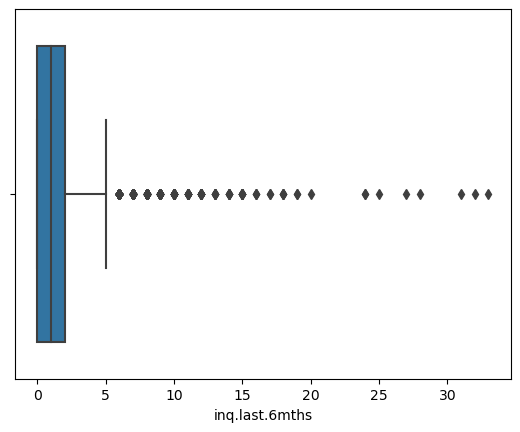

In [263]:
sns.boxplot(Data['inq.last.6mths'])


<AxesSubplot:xlabel='delinq.2yrs'>

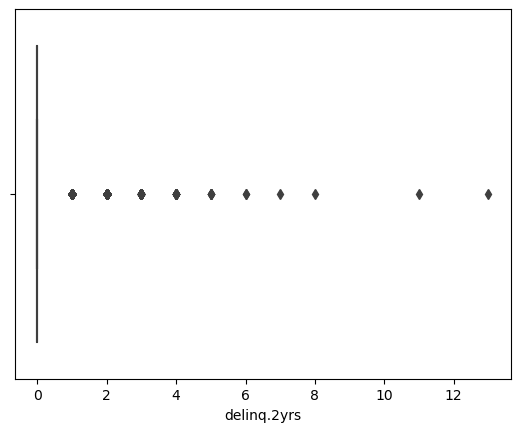

In [264]:
sns.boxplot(Data['delinq.2yrs'])


<AxesSubplot:xlabel='pub.rec'>

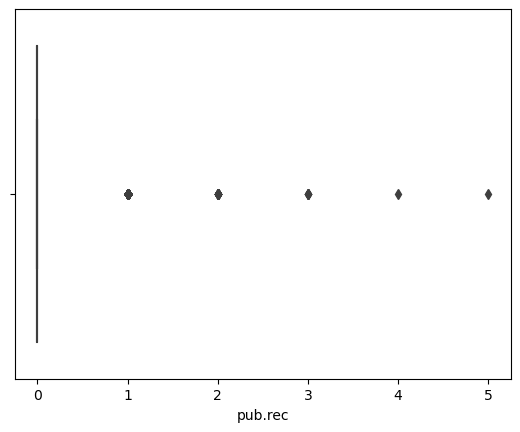

In [265]:
sns.boxplot(Data['pub.rec'])


<AxesSubplot:xlabel='not.fully.paid'>

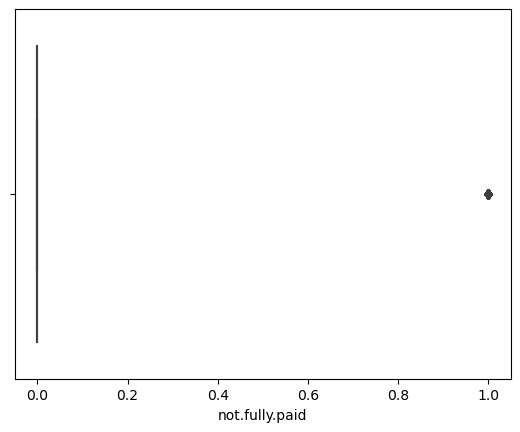

In [266]:
sns.boxplot(Data['not.fully.paid'])

In [267]:
percentile25 = Data['credit.policy'].quantile(0.25)
percentile75 = Data['credit.policy'].quantile(0.75)
percentile25 = Data['int.rate'].quantile(0.25)
percentile75 = Data['int.rate'].quantile(0.75)
percentile25 = Data['installment'].quantile(0.25)
percentile75 = Data['installment'].quantile(0.75)
percentile25 = Data['log.annual.inc'].quantile(0.25)
percentile75 = Data['log.annual.inc'].quantile(0.75)
percentile25 = Data['dti'].quantile(0.25)
percentile75 = Data['dti'].quantile(0.75)
percentile25 = Data['fico'].quantile(0.25)
percentile75 = Data['fico'].quantile(0.75)
percentile25 = Data['days.with.cr.line'].quantile(0.25)
percentile75 = Data['days.with.cr.line'].quantile(0.75)
percentile25 = Data['revol.bal'].quantile(0.25)
percentile75 = Data['revol.bal'].quantile(0.75)
percentile25 = Data['revol.util'].quantile(0.25)
percentile75 = Data['revol.util'].quantile(0.75)
percentile25 = Data['inq.last.6mths'].quantile(0.25)
percentile75 = Data['inq.last.6mths'].quantile(0.75)
percentile25 = Data['delinq.2yrs'].quantile(0.25)
percentile75 = Data['delinq.2yrs'].quantile(0.75)
percentile25 = Data['pub.rec'].quantile(0.25)
percentile75 = Data['pub.rec'].quantile(0.75)
percentile25 = Data['not.fully.paid'].quantile(0.25)
percentile75 = Data['not.fully.paid'].quantile(0.75)







In [268]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR= Q3-Q1
print(IQR)

credit.policy            0.000000
int.rate                 0.036800
installment            268.992500
log.annual.inc           0.732879
dti                     10.737500
fico                    55.000000
days.with.cr.line     2910.000000
revol.bal            15062.500000
revol.util              48.300000
inq.last.6mths           2.000000
delinq.2yrs              0.000000
pub.rec                  0.000000
not.fully.paid           0.000000
dtype: float64


In [269]:
print(Data<(Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))

      credit.policy  days.with.cr.line  delinq.2yrs    dti   fico  \
0             False              False        False  False  False   
1             False              False        False  False  False   
2             False              False        False  False  False   
3             False              False        False  False  False   
4             False              False        False  False  False   
...             ...                ...          ...    ...    ...   
9573           True              False        False  False  False   
9574           True              False        False  False  False   
9575           True              False        False  False  False   
9576           True              False        False  False  False   
9577           True              False        False  False  False   

      inq.last.6mths  installment  int.rate  log.annual.inc  not.fully.paid  \
0              False        False     False           False           False   
1            

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [270]:
Data_out = Data[~((Data < (Q1 - 1.1 * IQR)) |(Data > (Q3 +1.5 * IQR ))).any(axis=1)]
print(Data_out.shape)

(4902, 14)


## Tasl 2: From data feature distributions, please discuss whether we should normalise these features. 

## Data Analytics and Classification

In [271]:
Data normalisation is an important in trainig process. By doing this data to mean of 0 or standard deviation 1 , convergence is achieved. So, we need to normalise these features. 

SyntaxError: invalid syntax (3574408185.py, line 1)

Now, our target is to train a logistic regression model to predict 'credit.policy' with 13 features. This is a typical classification problem. 
## Task 3: It is unnecessary to use all 13 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

From the heatmaps, we can find different correlations between each feature and 'credit.policy'. 
We only reserve features that have positive correlations with 'credit.policy' by removing features with a low correlation with credit_policy.

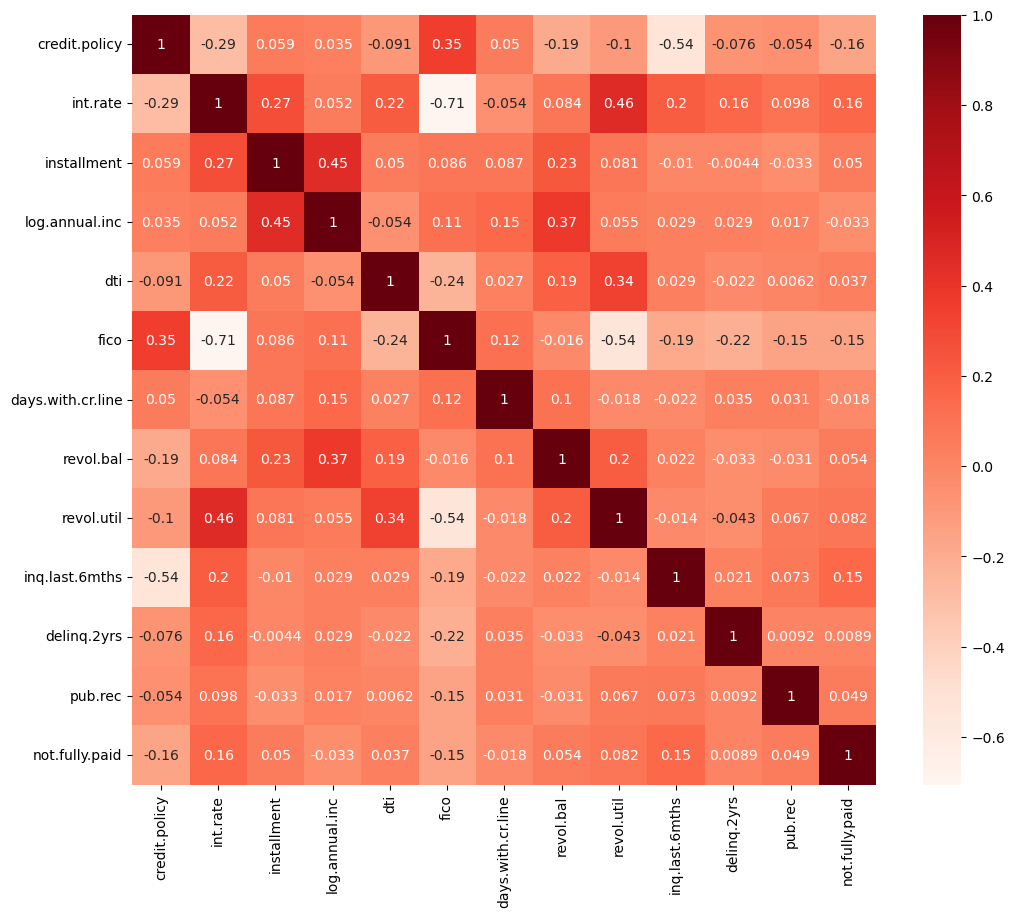

In [272]:
plt.figure(figsize=(12,10))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [273]:
cor_target = abs(cor["credit.policy"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

credit.policy     1.000000
inq.last.6mths    0.535511
Name: credit.policy, dtype: float64

In [274]:
print(Data[["credit.policy","inq.last.6mths"]].corr())


                credit.policy  inq.last.6mths
credit.policy        1.000000       -0.535511
inq.last.6mths      -0.535511        1.000000


## Data Preprocess

### Process of Object data type

The logistic regression model cannot well process the object data type. We convert this data type with OneHotEncoder such that this feature can be handled by the logistic regression model. 

In [275]:
dummy_purpose = pd.get_dummies(Data['purpose'])
dummy_purpose.head()  
New_Data = pd.concat((Data.iloc[:,0], dummy_purpose, Data.iloc[:,2:]), axis=1)
New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0,1,0,0,0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,0,0,1,0,0,0,0,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


### Dataset classification
We classify all data records into training set (80%), validation set (10%)  and test set (10%) so that we can determine hyper-parameters with k-cross validation. 

Randomly select 90% as the training + validation sets. The rest 10% will be used as the test set. 

In [276]:
from sklearn.model_selection import train_test_split
print(New_Data['credit.policy'].value_counts())


1    7710
0    1868
Name: credit.policy, dtype: int64


We complete dataset classification as below. 

In [277]:
x_ex1 = New_Data.copy().drop(columns=['credit.policy', 'int.rate','revol.bal', 'inq.last.6mths', 'not.fully.paid' ])
y_ex1 = New_Data.copy()['credit.policy']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_ex1_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.9),:]
x_ex1_test = x_ex1_array[int((len(y_ex1_array)+1)*0.9):,:]
y_ex1_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.9)]
y_ex1_test = y_ex1_array[int((len(y_ex1_array)+1)*0.9):]

### Data normalisation

## Task 4: Recall that we have observed large value discrepancies between these features. It is necessary to normalise these features before we use them to train our models.  Here, we emply standardization method to normalise our dataset as below. 

In [278]:
from sklearn.preprocessing import StandardScaler



In [279]:
Data = pd.DataFrame({'A':[1,1,1,1,1],'B':[0,0,1,1,0]})
print(Data)
scaler = StandardScaler()
scaled = scaler.fit_transform(Data)
print(scaled)


   A  B
0  1  0
1  1  0
2  1  1
3  1  1
4  1  0
[[ 0.         -0.81649658]
 [ 0.         -0.81649658]
 [ 0.          1.22474487]
 [ 0.          1.22474487]
 [ 0.         -0.81649658]]


## Model Evaluation
In this stage, we are going to train a logistic regression model. Cross validation will be used to determine hyper-parameters and evaluate model performance.


### Logistic Regression Model

## Task 5: Train a Logistic Regression Model with training dataset.

In [280]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

In [281]:
x_ex1_train, x_ex1_test, y_ex1_train, y_ex1_test = train_test_split(x_ex1, y_ex1, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_ex1_train, y_ex1_train)


LogisticRegression()

In [282]:
y_ex1_pred = logreg.predict(x_ex1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_ex1_test, y_ex1_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [288]:
print("shape of dataframe is : ", Data.shape)

Data.info()

Data.describe()

shape of dataframe is :  (5, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       5 non-null      int64
 1   B       5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


,A,B
count,5.0,5.000000
mean,1.0,0.400000
std,0.0,0.547723
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,1.000000
max,1.0,1.000000


In [299]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_ex1_train,y_ex1_train)
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-0.16585005]
The coefficient b1=  [[-2.00054453e-01  8.22015720e-02  1.71118882e-01 -1.32866147e-01
  -2.60249496e-02  5.44410087e-02 -1.14306894e-01  1.16829273e-03
  -8.99498504e-01 -3.73578839e-02  1.57458739e-02  1.17466536e-04
   6.25315040e-04 -8.10987526e-02 -2.11079537e-01]]


In [300]:
y_ex1_pred= modelLogistic.predict(x_ex1_test)


In [305]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, x_ex1, y_ex1, cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 80.998% (0.521%)



## Task 6: To better understand our result, we visualize the performance evluation by comparing the model accuracy of the Logistic Regression model on the training dataset and each validation dataset.

In [312]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(x_ex1_train, y_ex1_train)



KNeighborsRegressor(n_neighbors=2)

From the visualised results, we can observe that the model prediction performance is very good. The accuracy on validation dataset is only slightly lower than the accuracy on the training dataset. This result is convincing since we have conducted 9 fold cross validation. Our cross validation indicates that we have obtained an accurate model. 

## Note that the test dataset is not used for evaluation. Since there is no hyperparameter in the Logistic Regression model, the cross-validation has reflected the performance of the model on unknown datasets. 